# 區域性異常因子(Local Outlier Factor)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from tqdm.notebook import tqdm

# MNIST Dataset

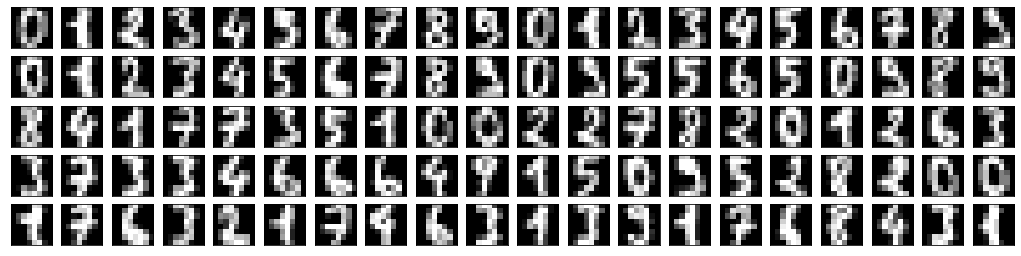

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=(digits.data/16)
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Principal Component Anlysis

In [3]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# Reachability distance

In [4]:
N=X.shape[0]
k=5
distance_matrix = cdist(X,X,"euclidean")
k_distance=np.sort(distance_matrix,axis=0)[k+1]
k_distance_matrix=np.outer(np.ones(N),k_distance)
reach_distacne=np.maximum(distance_matrix,k_distance_matrix)

# local reachability density

In [5]:
sort_index=np.argsort(distance_matrix,axis=1)[:,1:k+1]
IRD=np.zeros(N)
for i in range(N):
    IRD[i]=1/np.mean(reach_distacne[i,sort_index[i]])

# LOF

In [6]:
LOF=np.zeros(N)
for i in range(N):
    LOF[i]=np.mean(IRD[sort_index[i]])/IRD[i]

# Plot

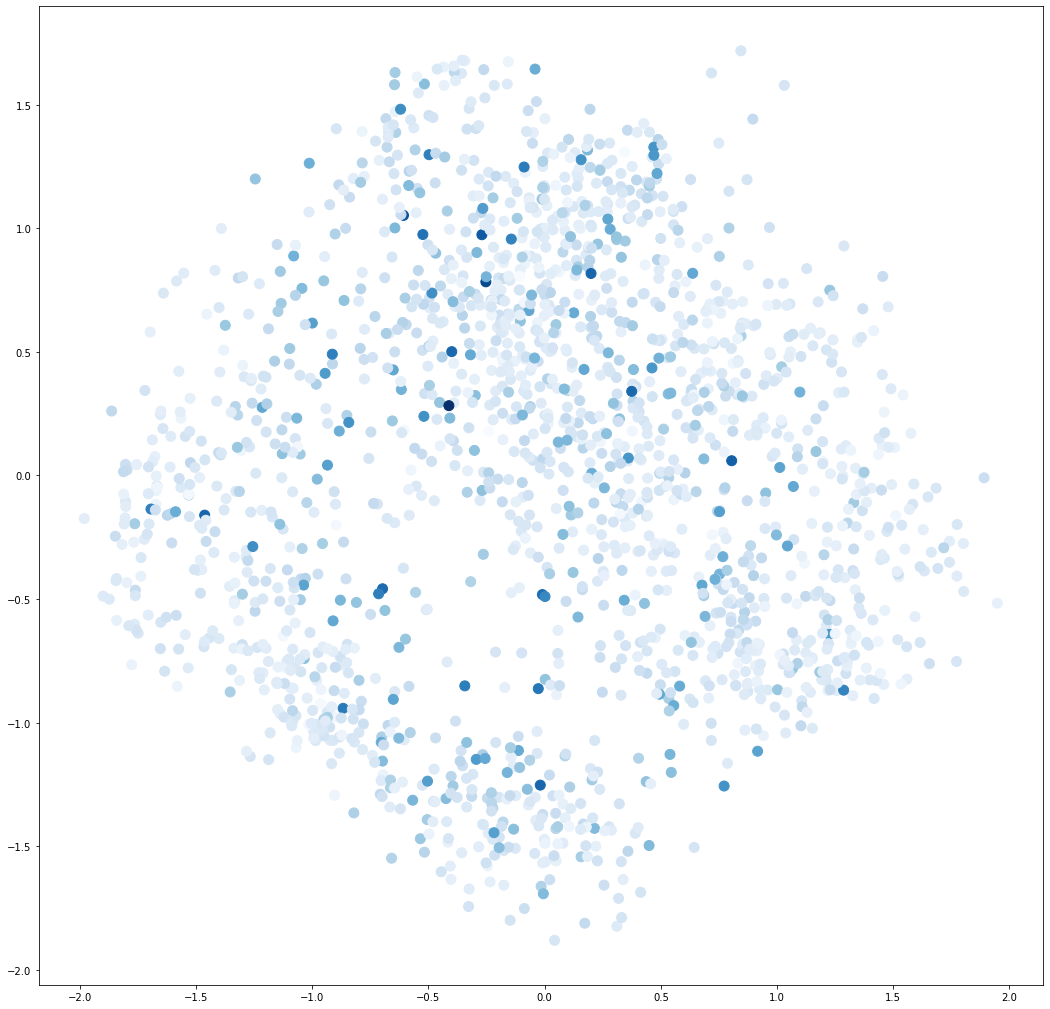

In [7]:
X_emb=PCA(X,2,N)
plt.scatter(X_emb[:,0],X_emb[:,1],c=LOF, s=100,cmap='Blues')
plt.show()

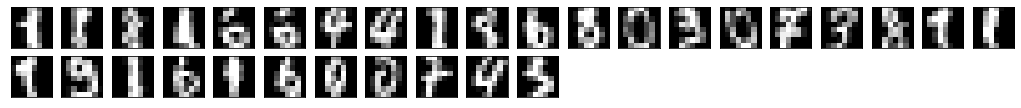

In [8]:
plt.rcParams["figure.figsize"] = (18,18)
outlier_index=np.array(np.where(LOF>1.3)).ravel()
plt.gray() 
for i in range(len(outlier_index)):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[outlier_index[i]], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 